CS3920 Assignment 1

___
functions

In [1]:
import numpy as np
import math as mt
from collections import Counter
from heapq import nsmallest


def inner_product(x:list, y:list)->float:
    """Calculate inner product of two vector

    Args:
        x1 (list): 1d vector array
        y1 (list): 1d vector array

    Returns:
        float: inner product of two vector
    """
    return np.dot(x, y)


def euclidean_distance(x:list, y:list) -> float:
    """distance between two point

    Args:
        x (list): vector array
        y (list): vector array

    Returns:
        float: distance of difference of two vector
    """
    return (np.dot(x,x)-2*np.dot(x,y)+np.dot(y,y))

def ec(x, y) -> float:
    """distance between two point

    Args:
        x (list): vector array
        y (list): vector array

    Returns:
        float: distance of difference of two vector
    """
    return np.sum((x - y) ** 2)


def most_frequent(list:list):
    """return the most frequent element from the list

    Args:
        list (list): list

    Returns:
        _type_: _description_
    """
    return Counter(list).most_common(1)[0][0]


def indice_sort2(b):
    return np.argsort(b)

def indice_sort(pq, k):
    """return index of elements when the list is sorted

    Args:
        pq (list): list to be sorted
        k (int): numbers of elements wanted to be sorted

    Returns:
        list: indice of sorted elements
    """
    c=[[pq[i],i] for i in range(len(pq))]
    return  nsmallest(k, c, key=lambda x: x[0])

def p_val(x:dict):
    sum =0
    q = x.copy()
    for i in x.keys():
        sum += mt.sqrt(x[i])
    for i in x.keys():
        if x[i]==0:
            q[i] = float('inf')
        else:
            q[i] = sum/mt.sqrt(x[i])-1
    return q







___
test function

In [2]:
import time
def time_func(predicate, x):
    """test function for runtime of another function

    Args:
        predicate (function): function for test
        x (set): input arguments

    Returns:
        set: value and runtime
    """
    start = time.time()
    x =predicate(*x)
    y =(time.time() - start)
    print("Result of run test: ", x)
    print("Run time of test: ",y)
    return (x,y)


a=[70, 78, 26, 30, 2, 89, 56, 92, 82, 60, 21, 66, 37, 38, 36, 40, 83, 88, 64]
aa=np.array(a)
b=[9, 6, 22, 39, 94, 70, 52, 72, 7, 98, 82, 0, 5, 3, 20, 38, 90, 30, 76]
bb=np.array(b)
cc=np.array([3,4,6])
print(time_func(euclidean_distance,(a, b)))
print(time_func(ec,(aa, bb)))
print(indice_sort(b,3))
print(indice_sort2(b))
print(time_func(indice_sort,[b,3]))
print(time_func(indice_sort2,[b]))


Result of run test:  39455
Run time of test:  0.0
(39455, 0.0)
Result of run test:  39455
Run time of test:  0.0
(39455, 0.0)
[[0, 11], [3, 13], [5, 12]]
[11 13 12  1  8  0 14  2 17 15  3  6  5  7 18 10 16  4  9]
Result of run test:  [[0, 11], [3, 13], [5, 12]]
Run time of test:  0.0
([[0, 11], [3, 13], [5, 12]], 0.0)
Result of run test:  [11 13 12  1  8  0 14  2 17 15  3  6  5  7 18 10 16  4  9]
Run time of test:  0.0
(array([11, 13, 12,  1,  8,  0, 14,  2, 17, 15,  3,  6,  5,  7, 18, 10, 16,
        4,  9], dtype=int64), 0.0)


___
K Nearest Neighbours class

In [3]:
class KNN:
    def __init__(self,k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train=X
        self.y_train=y

    def predict(self, X):
        predicted_sample = [self._predict(x) for x in X]
        return np.array(predicted_sample)

    def con_predict(self, X, y):
        #create dictionary
        self.y_set = set(self.y_train)
        size = X.shape[0]
        predicted_sample = [self._con_predict(x) for x in X]
        result = [self._aver_fal_p(predicted_sample[i], y[i] ) for i in range(size)]
        return np.mean(result)

    def pd(self, X):
        """test"""
        predicted_sample = [self._p(x) for x in X]
        return np.array(predicted_sample)



    def _predict(self, x):
        """_summary_

        Args:
            x (_type_): _description_

        Returns:
            _type_: _description_
        """
        k_indices = self._k_nearest_neighbor(x)
        #map index to label
        k_nearest_labels = [self.y_train[i[1]]for i in k_indices]
        # majority vote, most common class label
        return most_frequent(k_nearest_labels)

    def _p(self, x):
        """test"""
        k_indices = self._k_nearest_neighbor(x)
        #map index to label
        return [self.y_train[i[1]]for i in k_indices]

    def _con_predict(self, x):
        #map index to label
        k_indices = self._k_nearest_neighbor(x)
        #map index to label
        k_nearest_labels = [self.y_train[i[1]]for i in k_indices]
        #create dictionary
        dict = {}
        for j in self.y_set:
            dict.update({j:0})
        for i in k_indices:
            dict[self.y_train[i[1]]] += i[0]
        return dict

    def _k_nearest_neighbor(self, x):
        # compute distance of input and train set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # get indice of k nearest sample
        return indice_sort(distances,self.k)


    def _aver_fal_p(self, x, y):
        x_new = p_val(x)
        fp =0
        for i in x_new.keys():
            if i!=y:
                fp += x[i]
        return fp

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)




___
import library

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
ionosphere_X = np.genfromtxt("ionosphere.txt", delimiter=",", usecols=np.arange(34))
ionosphere_y = np.genfromtxt("ionosphere.txt", delimiter=",",
    usecols=34, dtype='int')
print("Dataset imported sucessfully")


Dataset imported sucessfully


___
Test Error rate of Iris Dataset

Text(0, 0.5, 'Test Error rate')

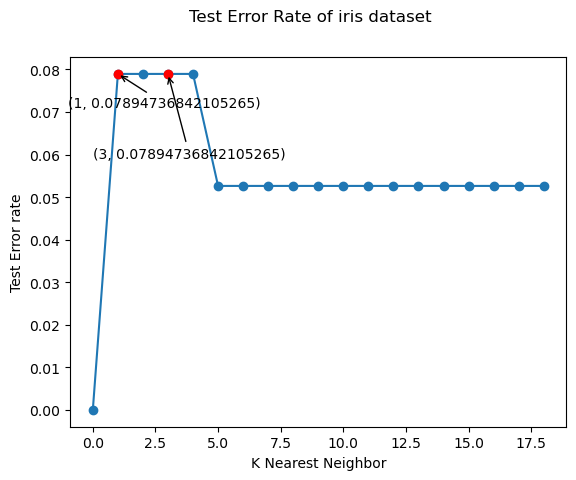

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
iris['target'], random_state=412)
result =np.empty(19)
for i in range(1,19):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    result[i]=(1-knn.score(X_test, y_test))

plt.plot(np.arange(19), result,marker="o")
plt.plot(1,result[1],'ro')
txt1 = "({x1}, {y1})".format(x1 = 1, y1 = result[1])
plt.annotate(txt1, xy=(1,result[1]), xytext=(-1, result[1]*0.9),
             arrowprops=dict(arrowstyle="->"))
plt.plot(3,result[3],'ro')
txt1 = "({x1}, {y1})".format(x1 = 3, y1 = result[3])
plt.annotate(txt1, xy=(3,result[3]), xytext=(0, result[3]*0.75),
             arrowprops=dict(arrowstyle="->"))
plt.suptitle("Test Error Rate of iris dataset")
plt.xlabel("K Nearest Neighbor")
plt.ylabel("Test Error rate")


___
Test Error rate of Ionosphere dataset

Text(0, 0.5, 'Test Error rate')

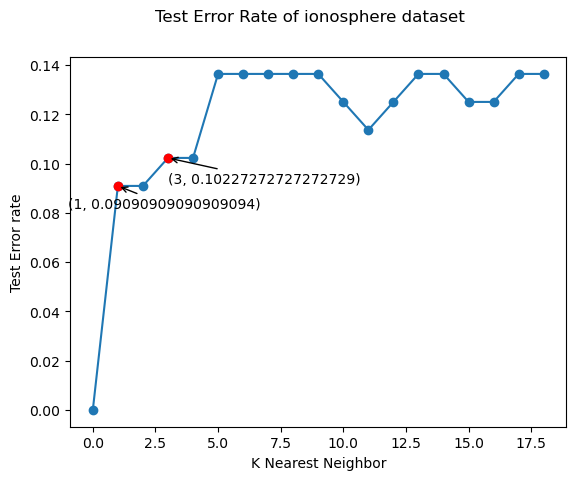

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ionosphere_X, ionosphere_y, random_state=412)
result =np.empty(19)
for i in range(1,19):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    result[i]=(1-knn.score(X_test, y_test))

plt.plot(np.arange(19), result,marker="o")
plt.plot(1,result[1],'ro')
txt1 = "({x1}, {y1})".format(x1 = 1, y1 = result[1])
plt.annotate(txt1, xy=(1,result[1]), xytext=(-1, result[1]*0.9),
             arrowprops=dict(arrowstyle="->"))
plt.plot(3,result[3],'ro')
txt1 = "({x1}, {y1})".format(x1 = 3, y1 = result[3])
plt.annotate(txt1, xy=(3,result[3]), xytext=(3, result[3]*0.9),
             arrowprops=dict(arrowstyle="->"))
plt.suptitle("Test Error Rate of ionosphere dataset")
plt.xlabel("K Nearest Neighbor")
plt.ylabel("Test Error rate")


___
 Average false p-value for the nearest neighbor conformal predictor applied to the iris dataset

Text(0, 0.5, 'Average false p-value')

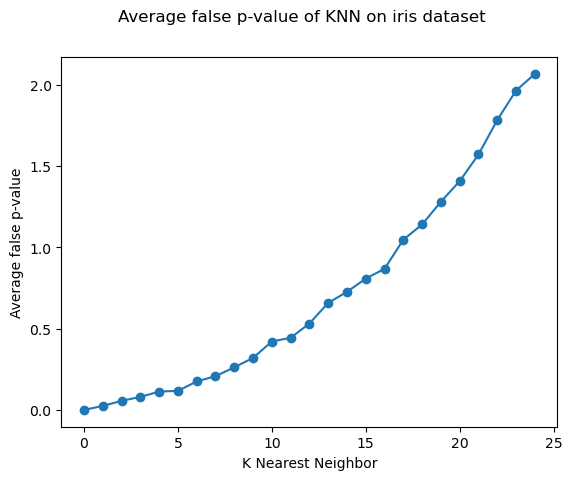

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'],
iris['target'], random_state=412)
K_max =25
result =np.empty(K_max)
for i in range(1,K_max):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    result[i]=(knn.con_predict(X_test, y_test))

plt.plot(np.arange(K_max), result,marker="o")
plt.suptitle("Average false p-value of KNN on iris dataset")
plt.xlabel("K Nearest Neighbor")
plt.ylabel("Average false p-value")

___
 Average false p-value for the nearest neighbor conformal predictor applied to ionosphere dataset

Text(0, 0.5, 'Average false p-value')

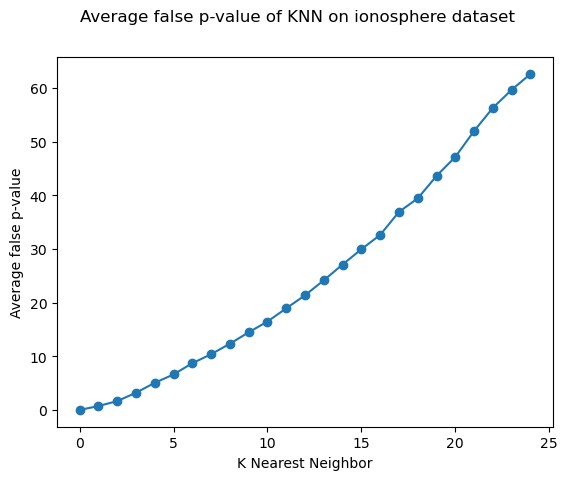

In [8]:
X_train, X_test, y_train, y_test = train_test_split(ionosphere_X,
ionosphere_y, random_state=412)
K_max =25
result =np.empty(K_max)
for i in range(1,K_max):
    knn = KNN(k=i)
    knn.fit(X_train, y_train)
    result[i]=(knn.con_predict(X_test, y_test))

plt.plot(np.arange(K_max), result,marker="o")
plt.suptitle("Average false p-value of KNN on ionosphere dataset")
plt.xlabel("K Nearest Neighbor")
plt.ylabel("Average false p-value")